In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as skl

from sklearn import preprocessing
%matplotlib inline


In [67]:
abc = pd.read_csv('test.csv',usecols=['Innings Balls Faced','Innings Boundary Fours','Innings Boundary Sixes','Label'])

In [68]:
abc

,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Label
0,45,5,3,2
1,137,20,4,4
2,88,11,3,3
3,55,1,5,2
4,13,3,0,1
5,62,6,4,2
6,92,7,5,3
7,133,13,6,4
8,56,5,4,2
9,18,0,2,1


In [69]:
import math as mth

for i in abc:
    label = 0.7219 + 0.009781 * abc['Innings Balls Faced'] + 0.04518 * abc['Innings Boundary Fours'] + 0.1331 * abc['Innings Boundary Sixes'] #MAIN MODEL
    # label = 0.8552 + 0.10680 * abc['Innings Boundary Fours'] + 0.2059 * abc['Innings Boundary Sixes'] #    WITH FOUR AND SIX 
    # label = 0.6879 + 0.016384 * abc['Innings Balls Faced'] # ONLY BALLS
for i in label:
    xyz = np.mean(np.abs((label - abc['Label']) / abc['Label'])) * 100
print(xyz)

17.116060062893087


In [70]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(abc['Label'],label))
print(rmse)

0.3100217175034556


In [53]:
# RMSE ((GOOD MODEL < 0.5))

# SACHIN TEST
# - MAIN MODEL - RMSE - 0.329
# - FOUR AND SIX - RMSE - 0.4636
# - BALLS FACED ONLY - RMSE - 0.364

# ROHIT TEST
# - MAIN MODEL - RMSE - 0.31
# - FOUR AND SIX - RMSE - 0.4069
# - BALLS FACED ONLY - RMSE - 0.40


In [2]:
df = pd.read_csv('ODI.csv', usecols=['Innings Player','Innings Runs Scored Num','Innings Minutes Batted','Innings Balls Faced','Innings Boundary Fours','Innings Boundary Sixes','Innings Batting Strike Rate'])#A,C,D,G,HI,J

C:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171968 entries, 0 to 171967
Data columns (total 7 columns):
Innings Player                 171968 non-null object
Innings Runs Scored Num        85984 non-null object
Innings Minutes Batted         85984 non-null object
Innings Balls Faced            85984 non-null object
Innings Boundary Fours         85984 non-null object
Innings Boundary Sixes         85984 non-null object
Innings Batting Strike Rate    85984 non-null object
dtypes: object(7)
memory usage: 9.2+ MB


In [4]:
df.isnull().sum()

Innings Player                     0
Innings Runs Scored Num        85984
Innings Minutes Batted         85984
Innings Balls Faced            85984
Innings Boundary Fours         85984
Innings Boundary Sixes         85984
Innings Batting Strike Rate    85984
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85984 entries, 0 to 85983
Data columns (total 7 columns):
Innings Player                 85984 non-null object
Innings Runs Scored Num        85984 non-null object
Innings Minutes Batted         85984 non-null object
Innings Balls Faced            85984 non-null object
Innings Boundary Fours         85984 non-null object
Innings Boundary Sixes         85984 non-null object
Innings Batting Strike Rate    85984 non-null object
dtypes: object(7)
memory usage: 5.2+ MB


In [7]:
df.isnull().sum()

Innings Player                 0
Innings Runs Scored Num        0
Innings Minutes Batted         0
Innings Balls Faced            0
Innings Boundary Fours         0
Innings Boundary Sixes         0
Innings Batting Strike Rate    0
dtype: int64

In [8]:
df.head()

,Innings Player,Innings Runs Scored Num,Innings Minutes Batted,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate
0,JJ Roy,180,151,151,16,5,119.20
1,AD Hales,171,166,122,22,4,140.16
2,RA Smith,167,208,163,17,3,102.45
3,JJ Roy,162,172,118,13,3,137.28
4,DI Gower,158,177,118,18,4,133.89


In [9]:
df = df[~df['Innings Runs Scored Num'].isin(['-'])]
df = df[~df['Innings Minutes Batted'].isin(['-'])]
df = df[~df['Innings Balls Faced'].isin(['-'])]
df = df[~df['Innings Boundary Fours'].isin(['-'])]
df = df[~df['Innings Boundary Sixes'].isin(['-'])]
df = df[~df['Innings Batting Strike Rate'].isin(['-'])]


In [10]:
df['Innings Runs Scored Num'].astype(str).astype(int).describe()


count    54776.000000
mean        23.634146
std         26.871430
min          0.000000
25%          4.000000
50%         14.000000
75%         34.000000
max        264.000000
Name: Innings Runs Scored Num, dtype: float64

In [11]:
df['Innings Minutes Batted'].astype(str).astype(int).describe()


count    54776.000000
mean        43.380166
std         42.938559
min          0.000000
25%         11.000000
50%         28.000000
75%         62.000000
max        257.000000
Name: Innings Minutes Batted, dtype: float64

In [12]:
df['Innings Balls Faced'].astype(str).astype(int).describe()


count    54776.000000
mean        31.226358
std         30.710137
min          1.000000
25%          8.000000
50%         20.000000
75%         45.000000
max        201.000000
Name: Innings Balls Faced, dtype: float64

In [13]:
df['Innings Boundary Fours'].astype(str).astype(int).describe()


count    54776.000000
mean         2.068607
std          2.782596
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         33.000000
Name: Innings Boundary Fours, dtype: float64

In [14]:
df['Innings Boundary Sixes'].astype(str).astype(int).describe()


count    54776.000000
mean         0.301026
std          0.822630
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: Innings Boundary Sixes, dtype: float64

In [15]:
new = df[['Innings Runs Scored Num', 'Innings Minutes Batted',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate']].copy()

In [16]:
new.columns.values

array(['Innings Runs Scored Num', 'Innings Minutes Batted',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate'],
      dtype=object)

In [17]:
new = new.astype(str).astype(float).astype(int)

In [18]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54776 entries, 0 to 85773
Data columns (total 6 columns):
Innings Runs Scored Num        54776 non-null int32
Innings Minutes Batted         54776 non-null int32
Innings Balls Faced            54776 non-null int32
Innings Boundary Fours         54776 non-null int32
Innings Boundary Sixes         54776 non-null int32
Innings Batting Strike Rate    54776 non-null int32
dtypes: int32(6)
memory usage: 1.7 MB


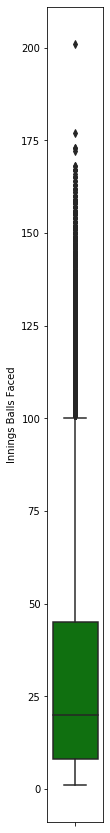

In [19]:
import seaborn as sns

plt.figure(figsize=(1,15))
sns.boxplot(new['Innings Balls Faced'],color='green',orient='v')


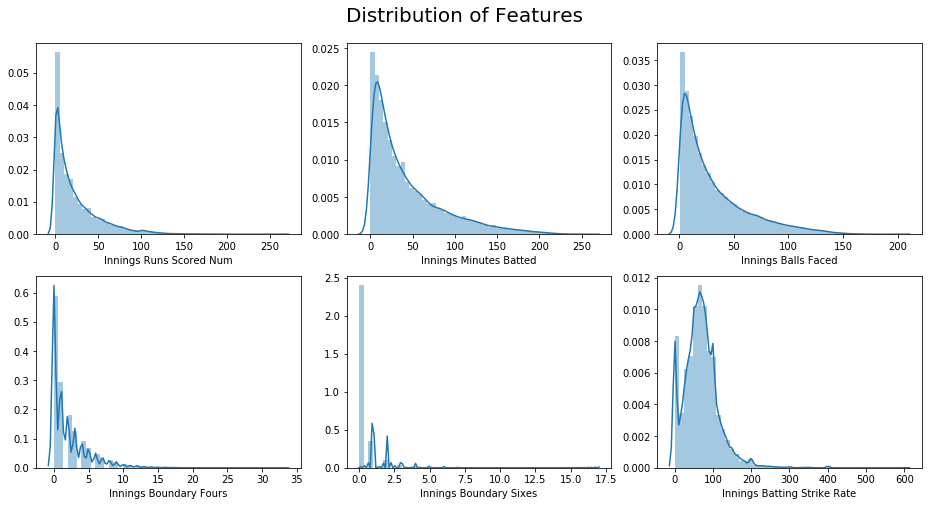

In [85]:
l = new.columns.values

noOfCols = 3
noOfRows = 2

fig=plt.figure(figsize=(13,10))
# plt.title("Distribution of Features")
for i in range(0,len(l)):
    plt.subplot(noOfRows+1,noOfCols,i+1)
    sns.distplot(new[l[i]],kde=True)

fig.suptitle("Distribution of Features",fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

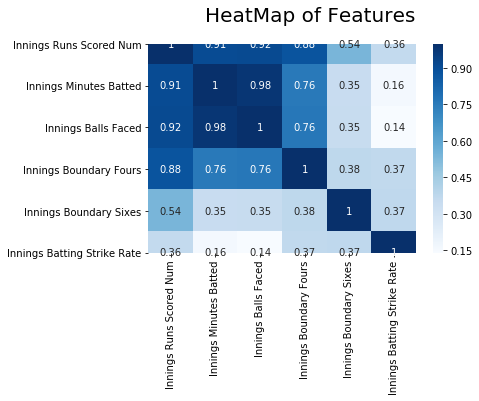

In [91]:
fig = plt.figure(figsize=(6,4))
fig.suptitle('HeatMap of Features', fontsize=20)
sns.heatmap(new.corr(),cmap='Blues',annot=True) 
fig.subplots_adjust(top=0.85)
plt.show()

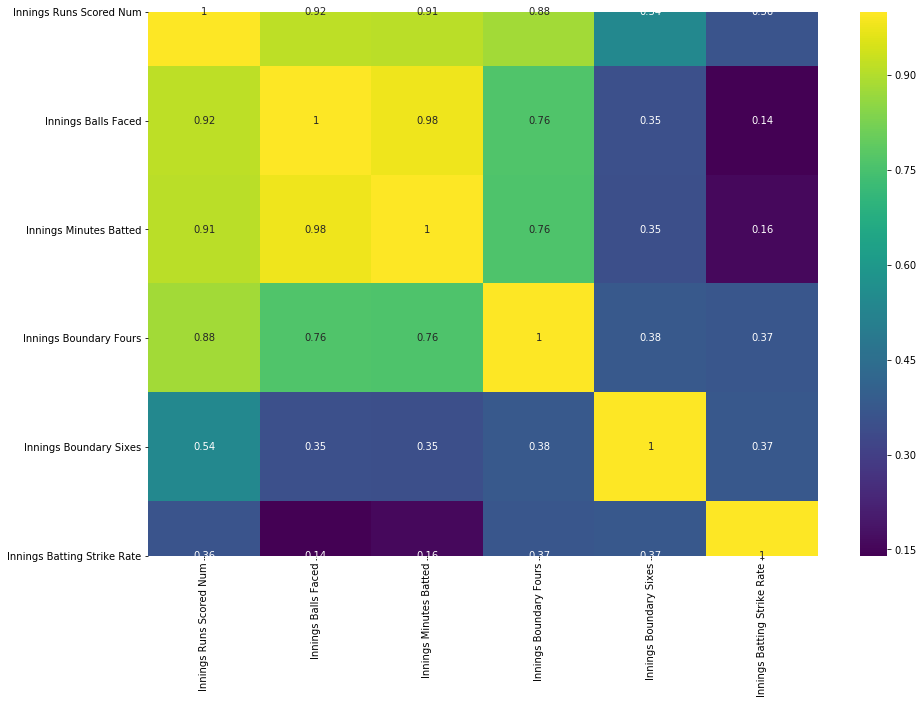

In [158]:
k = 9
cols = new.corr().nlargest(k,'Innings Runs Scored Num')['Innings Runs Scored Num'].index
cm = new[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap='viridis')

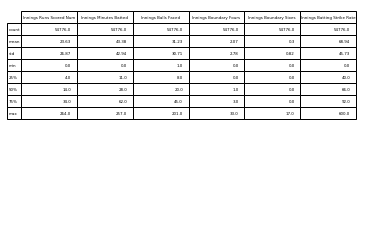

In [118]:
from pandas.plotting import table

desc = new.describe()
desc = np.round(desc, decimals=2)
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
tab = table(plot, desc,loc='upper right')
tab.auto_set_font_size(False)
tab.set_fontsize(4)

#save the plot as a png file


In [119]:
new.describe()

,Innings Runs Scored Num,Innings Minutes Batted,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate
count,54776.000000,54776.000000,54776.000000,54776.000000,54776.000000,54776.000000
mean,23.634146,43.380166,31.226358,2.068607,0.301026,68.944885
std,26.871430,42.938559,30.710137,2.782596,0.822630,45.728039
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,11.000000,8.000000,0.000000,0.000000,40.000000
50%,14.000000,28.000000,20.000000,1.000000,0.000000,66.000000
75%,34.000000,62.000000,45.000000,3.000000,0.000000,92.000000
max,264.000000,257.000000,201.000000,33.000000,17.000000,600.000000


In [136]:
normalized_X = skl.normalize([new['Innings Runs Scored Num']])

AttributeError: module 'sklearn' has no attribute 'normalize'